In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

# CONCEITO VISUAL DOS OTIMIZADORES

link com explicação detalhada: https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c

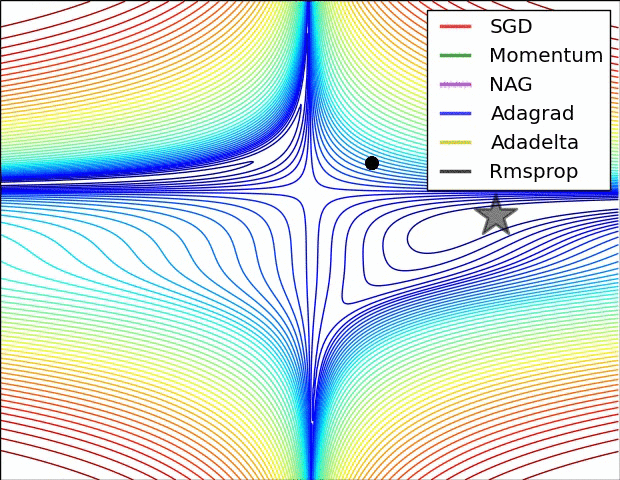

In [9]:
from IPython.display import Image
Image(filename = 'optimizers.gif')


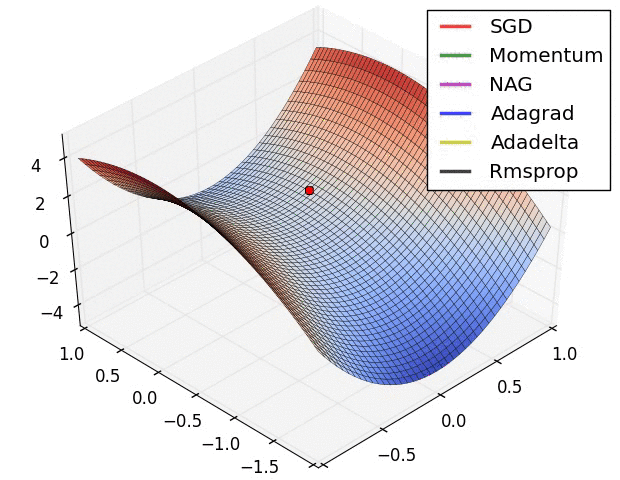

In [10]:
Image(filename = 'optimizers1.gif')

# CARREGANDO BANCO DE DADOS

In [11]:
dados = pd.read_csv("stroke.csv")
dados.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# PRÉ-PROCESSAMENTO DOS DADOS

1. Remoção de linhas nulas
2. Separação dos dados em X (variáveis independentes) e y (variável dependente)
3. Transformação das variáveis categóricas em numéricas (LabelEncoder e OneHotEncoder)
4. Separação em Teste e Treino
5. Normalização

# REMOVENDO DADOS NULOS EM BMI

In [12]:
dados = dados.dropna()
dados.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# SEPARANDO OS DADOS INDEPENDENTES E DEPENDENTES

In [13]:
x = dados.iloc[:, 1:-1]
y = dados.iloc[:, -1]
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


# TRANSFORMANDO VARIAVEIS CATEGORICAS BINARIAS EM NUMERICAS

In [14]:
# unique pra descobrir quantos rótulos únicos
colunas = ['ever_married', 'Residence_type'] 

label = LabelEncoder()
x[colunas] = x[colunas].apply(label.fit_transform)

x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked
2,Male,80.0,0,1,1,Private,0,105.92,32.5,never smoked
3,Female,49.0,0,0,1,Private,1,171.23,34.4,smokes
4,Female,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked
5,Male,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked


# TRANSFORMADOS DADOS CAETAGORICOS COM MAIS DE DUAS OPÇÃO

In [15]:
colunas = ['gender', 'work_type', 'smoking_status']
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), colunas)], remainder='passthrough')
x = ct.fit_transform(x)
x[0]

array([  0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
         0.  ,   1.  ,   0.  ,   0.  ,  67.  ,   0.  ,   1.  ,   1.  ,
         1.  , 228.69,  36.6 ])

# AJUSTANDO O NOME DAS COLUNAS

In [16]:
colunas = ['ohe1', 'ohe2', 'ohe3', 'ohe4', 'ohe5', 'ohe6', 'ohe7', 'ohe8', 'ohe9', 'ohe10', 'ohe11', 
           'ohe12', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 
           'avg_glucose_level', 'bmi']
pd.DataFrame(x, columns=colunas)

,ohe1,ohe2,ohe3,ohe4,ohe5,ohe6,ohe7,ohe8,ohe9,ohe10,ohe11,ohe12,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,67.0,0.0,1.0,1.0,1.0,228.69,36.6
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,80.0,0.0,1.0,1.0,0.0,105.92,32.5
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,49.0,0.0,0.0,1.0,1.0,171.23,34.4
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,79.0,1.0,0.0,1.0,0.0,174.12,24.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,81.0,0.0,0.0,1.0,1.0,186.21,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,103.08,18.6
4905,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,81.0,0.0,0.0,1.0,1.0,125.20,40.0
4906,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,35.0,0.0,0.0,1.0,0.0,82.99,30.6
4907,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,51.0,0.0,0.0,1.0,0.0,166.29,25.6


# SEPARANDO TREINO E TESTO

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print(len(x_train), len(x_test))

3927 982


# NORMALIZAÇÃO DOS DADOS

In [18]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train

array([[-1.19900642,  1.19963763, -0.0159597 , ..., -1.00946676,
        -0.84329404, -0.64822867],
       [ 0.83402389, -0.83358506, -0.0159597 , ..., -1.00946676,
         0.04840438, -0.25321721],
       [ 0.83402389, -0.83358506, -0.0159597 , ...,  0.99062202,
        -0.54591328, -0.75016711],
       ...,
       [-1.19900642,  1.19963763, -0.0159597 , ...,  0.99062202,
        -0.42585135,  1.23763247],
       [-1.19900642,  1.19963763, -0.0159597 , ...,  0.99062202,
         1.4944738 ,  1.03375559],
       [ 0.83402389, -0.83358506, -0.0159597 , ..., -1.00946676,
         1.2523526 , -0.20224799]])

# CRIANDO ARQUETETURA DA REDE NEURAK (MLP)

In [19]:
modelo = tf.keras.models.Sequential()
modelo.add(tf.keras.layers.Dense(units=6, activation='relu')) 
modelo.add(tf.keras.layers.Dense(units=6, activation='relu'))
modelo.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) 

# TREINANDO MODELO com OTIMIZADOR SGD

In [20]:
modelo.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
sgd = modelo.fit(x_train, y_train, batch_size=32, epochs=100) # tamanho de lote de 32 e 20 épocas.


Epoch 1/100


123/123 [==============================] - 3s 3ms/step - loss: 0.2625 - accuracy: 0.9608
Epoch 2/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1907 - accuracy: 0.9608
Epoch 3/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1716 - accuracy: 0.9608
Epoch 4/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1637 - accuracy: 0.9608
Epoch 5/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1594 - accuracy: 0.9608
Epoch 6/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1563 - accuracy: 0.9608
Epoch 7/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1539 - accuracy: 0.9608
Epoch 8/100
123/123 [==============================] - 0s 4ms/step - loss: 0.1519 - accuracy: 0.9608
Epoch 9/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1501 - accuracy: 0.9608
Epoch 10/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1486 - acc

# OTIMIZADOR ADAM 

In [21]:
modelo = tf.keras.models.Sequential()
modelo.add(tf.keras.layers.Dense(units=6, activation='relu')) 
modelo.add(tf.keras.layers.Dense(units=6, activation='relu'))
modelo.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) 

modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
adam = modelo.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
123/123 [==============================] - 2s 3ms/step - loss: 0.3810 - accuracy: 0.9542
Epoch 2/100
123/123 [==============================] - 0s 3ms/step - loss: 0.2281 - accuracy: 0.9608
Epoch 3/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1802 - accuracy: 0.9608
Epoch 4/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1615 - accuracy: 0.9608
Epoch 5/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1525 - accuracy: 0.9608
Epoch 6/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1476 - accuracy: 0.9608
Epoch 7/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1442 - accuracy: 0.9608
Epoch 8/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1417 - accuracy: 0.9608
Epoch 9/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1397 - accuracy: 0.9608
Epoch 10/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1382 - accura

# VISUALIZANDO TREINAMENTO

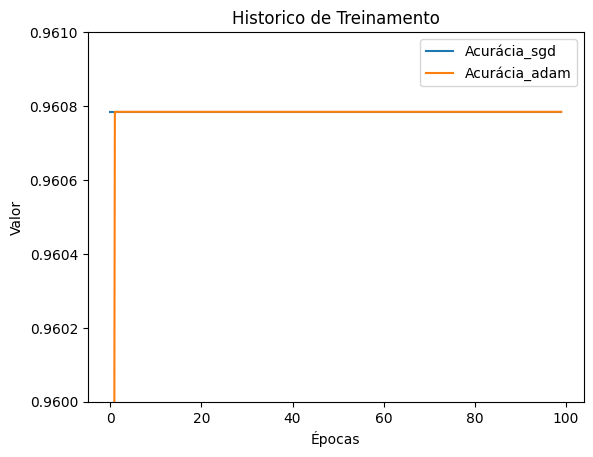

In [35]:
plt.plot(sgd.history['accuracy'], label='Acurácia_sgd')
plt.plot(adam.history['accuracy'], label='Acurácia_adam')

plt.xlabel('Épocas')
plt.ylabel('Valor')
plt.ylim(0.96, 0.961)
plt.title('Historico de Treinamento')

plt.legend()
plt.show()

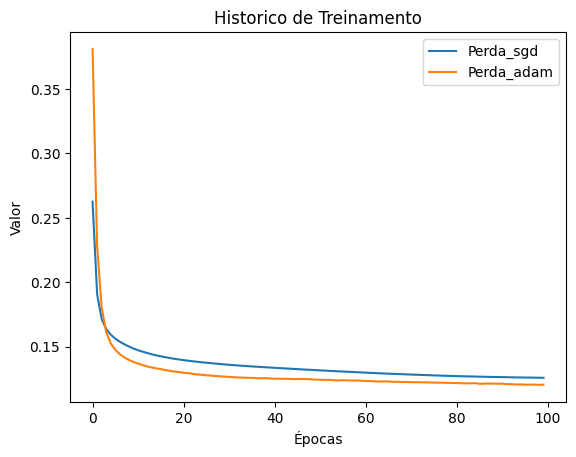

In [30]:
plt.plot(sgd.history['loss'], label='Perda_sgd')
plt.plot(adam.history['loss'], label='Perda_adam')

plt.xlabel('Épocas')
plt.ylabel('Valor')
plt.title('Historico de Treinamento')

plt.legend()
plt.show()

# ANALISANDO RESULTADOS

In [23]:
y_pred = modelo.predict(x_test)
y_pred = (y_pred > 0.5)

pred_array = 1 * y_pred.reshape(len(y_pred), 1)
test_array = y_test.values.reshape(len(y_test), 1)

print(np.concatenate([pred_array, test_array], axis=1))

31/31 [==============================] - 0s 2ms/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [24]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[927   0]
 [ 55   0]]
0.9439918533604889


In [25]:
dados['stroke'].value_counts()

stroke
0    4700
1     209
Name: count, dtype: int64

# MOSTRAR ESTUDO DOS MELHOR OTIMIZADOR

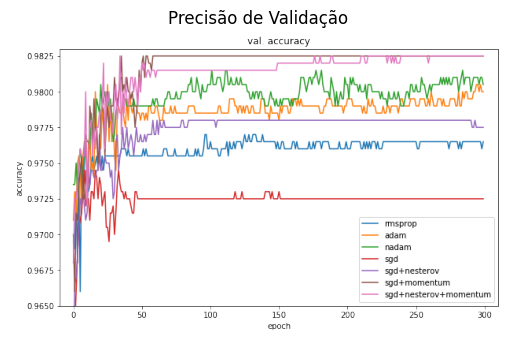

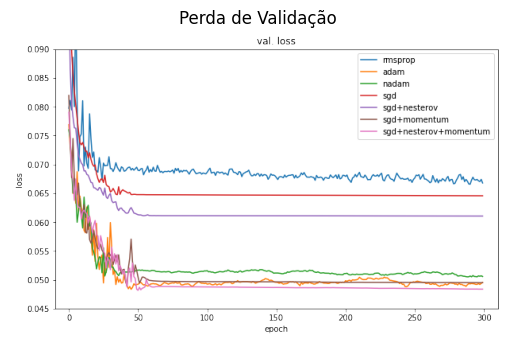

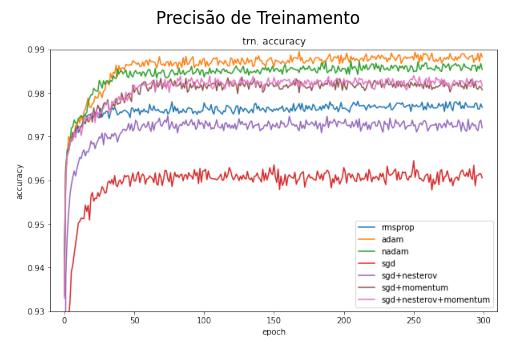

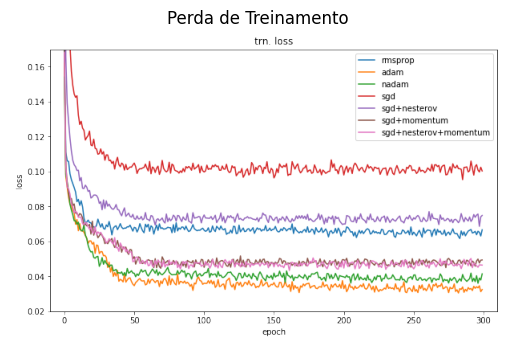

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as img

imagem = img.imread('val_acc.png')
plt.imshow(imagem)
plt.title('Precisão de Validação')
plt.axis('off') 
plt.show()

imagem = img.imread('val_loss.png')
plt.imshow(imagem)
plt.title('Perda de Validação')
plt.axis('off') 
plt.show()

imagem = img.imread('trn_acc.png')
plt.imshow(imagem)
plt.title('Precisão de Treinamento')
plt.axis('off') 
plt.show()

imagem = img.imread('trn_loss.png')
plt.imshow(imagem)
plt.title('Perda de Treinamento')
plt.axis('off') 
plt.show()

# CONCLUSÃO DO ESTUDO

Meus pensamentos:

- No geral, Adam/Nadam apresentam menor erro/perda de treinamento, mas não val. erro/perda.

- SGD e SGD + Nesterov ainda estão em subajuste após a época 300 (devido à baixa taxa de aprendizado?)

- Curvas de SGDs válidas. os dados são mais suaves após 100 épocas do que os otimizadores adaptativos porque os últimos têm maior valor de atualização quando atingem o estado estacionário (onde o momento de 2ª ordem é pequeno)?

- O que causa a flutuação severa é válido. precisão de SGD+Nest.+momentum?

- E se eu embaralhar os dados de treinamento após cada época? Os SGDs terão melhor desempenho?model.fit() já padronizou shuffle=True

- O modelo neste experimento é uma rede neural feed-forward simples com apenas 3 camadas ocultas. O artigo também fornece o resultado do experimento do VGG no cifar10 favorecendo o SGD. Mas será que o SGD ainda superará os otimizadores adaptativos em arquiteturas e conjuntos de dados mais complexos?

- (Atualizado em 29 de dezembro de 2017) Acontece que é comum usar SGDs para desempenho SOTA. Por exemplo, todos os papéis ResNet , DenseNet , ResNeXt , SENet e NASNet usaram SGD em sua implementação.

- (Atualizado em 29 de dezembro de 2017) Uma abordagem híbrida proposta neste artigo sugere que comecemos a treinar com Adam e mudemos para SGD quando uma condição de disparo for satisfeita. Isto diminui a lacuna de generalização entre SGD e Adam.

- Bem… considerarei seriamente usar SGD (e Adam ainda) em meus projetos de agora em diante.